In [3]:
%%capture
# OTTER IGNORE
! pip install drexel-jupyter-logger
! pip install otter-grader

# Lab 9: Combining Concepts to Build Interoperable Code for Plotting

This lab uses all of the concepts we have learned in python programming to make reusable building blocks for generating, plotting, and fitting data. 

As an engineer you will regularly be presented with noisy data and want to fit that data to a function. In this assignment, we will build some machinery and a coding schema to generate noisy data (since we do not have real data), plot data, and fit the results. We will build tools to simplify the visualization of the results. The code will be designed to be interoperable. If we were to have a new type of data or mathematical expression, we could reuse all the code we have written. 

## 1. Type your name

1.1 Type your full name as a `DataType:String`

In [4]:
import drexel_jupyter_logger

# type your full name as a string
name_ = "Your Name"  # SOLUTION


In [5]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: numpy correctly implemented.
failure_message: numpy random incorrectly implemented.
""" # END TEST CONFIG

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)

## 2. Importing Functions

Here we will import some packages that we need for this assignment

2.1 import `numpy` as `np`

2.2 import the submodule `matplotlib.pyplot` and assign it to `plt`

2.3 import from `scipy.optimize` the `curve_fit` function

In [6]:
# 2.1 you need to import numpy as np
import numpy as np # SOLUTION

# 2.2 You need to import the submodule matplotlib.pyplot and assign it to plt
import matplotlib.pyplot as plt # SOLUTION

# 2.3 You need to import from scipy.optimize the curve_fit function
from scipy.optimize import curve_fit # SOLUTION

In [7]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: numpy correctly implemented.
failure_message: numpy random incorrectly implemented.
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(np.__version__)
assert np.__version__ is not None

In [8]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: plt correctly implemented.
failure_message: plt random incorrectly implemented.
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(plt.__package__)
assert plt.__package__ is not None


In [9]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: plt correctly implemented.
failure_message: plt random incorrectly implemented.
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(curve_fit.__name__)
assert curve_fit.__name__ is not None

## 3. Implementing a Class for MathExpressions

In Python and programming in general, it is common to have a base class that adds functionality to an object. For example, if you have a car that you are building, you might want to add blind spot detection. You can create the blind spot detection software and hardware and install it on multiple cars types. We will do the same with a math function. We will build a class that adds a methods to fit and evaluate a math expression. 

When we build this class we need it to be flexible to accept math functions with a flexible number of input parameters. We implement a fit function where we can input any parameters into the function (this is important for optimization required to fit data), and an evaluate method which uses the parameters set during initialization. 

Follow these steps:

3.1 Define a `class` `MathExpression`.

3.2 Build an initialization function. 
- The function should take a variable `func` which is a mathematical function
- The function should accept `**kwargs` 
    - The `kwargs` will be the parameters of the fitting function 
    - We want to save the `kwargs`, each key-value pair of `kwargs` where the key is the variable name, and `func` as an attribute of the object

3.3 Define a method `fit`.
- That accepts a required input `x`, and `**kwargs`
- Return the result when you call the objects method `func` that accepts a required input `x`, and `**kwargs`

3.4 Define an method for the `class` `evaluate`.
- Takes a required input `x`
- Returns the result when you call the objects method `func` that accepts a required input `x`, and the `**kwargs` values set at initialization.

In [10]:
# 3.1 define a class MathExpression
class MathExpression: # SOLUTION
    
    # 3.2 Use the built in initialization function
    # The function should take a variable func which is a mathematical function for generation and fitting (we will define this later)
    # The function should accept **kwargs
    # The kwargs will be the parameters of the fitting function 
    # BEGIN SOLUTION
    def __init__(self, func, **kwargs):
    # END SOLUTION   
        
        # use the .items() method to extract from kwargs a list of tuples with the key value pairs
        # Create a for loop that extracts the key value pairs from the kwargs
        #   make sure to unpack the tuple into the variables key and value
        # Inside the for loop, use the built in python method setattr to add an attribute to the MathExpression Object 
        #   for the key, use the variable key, 
        #   for the value, use the variable value
        # BEGIN SOLUTION
        for key, value in kwargs.items():
            setattr(self, key, value)
        # END SOLUTION 
        
        # save the kwargs as an attribute of the object named kwargs
        # BEGIN SOLUTION
        self.kwargs = kwargs
        # END SOLUTION 
        
        # save the function as an attribute of the object named func
        # BEGIN SOLUTION
        self.func = func
        # END SOLUTION 
        
    # 3.3 for the class, define a method fit that accepts a required input x, and **kwargs
    #   x is the points to sample along the x axis
    #   **kwargs are new parameters to test
    #   Note: this is a requirement of the fitting function
    # BEGIN SOLUTION
    def fit(self, x, **kwargs):
    # END SOLUTION 
        
        # return the result when you call the object's method func that accepts a required input x and **kwargs
        # BEGIN SOLUTION
        return self.func(x, **kwargs)
        # END SOLUTION 
        
    # 3.4 for the class, define a method evaluate that takes a required input x
    # BEGIN SOLUTION
    def evaluate(self, x):
    # END SOLUTION 
       
        # return the result when you call the object's method func that accepts a required input x and the kwargs values set at initialization.
        # BEGIN SOLUTION
        return self.func(x, **self.kwargs)
        # END SOLUTION 

In [11]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: MathExpression is a Class
failure_message: MathExpression is not a Class
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(MathExpression)
assert isinstance(MathExpression, type)


In [12]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: __init__ implemented.
failure_message: __init__ not implemented.
"""  # END TEST CONFIG


assert '__init__' in dir(MathExpression) 

In [13]:
""" # BEGIN TEST CONFIG
points: 2
hidden: false
success_message: MathExpression inputs kwargs correctly implemented.
failure_message: MathExpression inputs kwargs not correctly implemented.
"""  # END TEST CONFIG


out = MathExpression("a", b=1, test='test')
drexel_jupyter_logger.variable_logger(out)
assert out.kwargs['b'] == 1
assert out.kwargs['test'] == 'test'

In [14]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: MathExpression function input correctly implemented.
failure_message: MathExpression function input not correctly implemented.
"""  # END TEST CONFIG

out = MathExpression(np.sum)
assert out.func is np.sum

In [15]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: fit is implemented.
failure_message: fit is not implemented.
"""  # END TEST CONFIG


assert 'fit' in dir(MathExpression) 

In [16]:
""" # BEGIN TEST CONFIG
points: 3
hidden: false
success_message: fit is implemented correctly.
failure_message: fit is not implemented correctly.
"""  # END TEST CONFIG

def test(x, **kwargs):
    return x, kwargs

out = MathExpression(test)
a, b = out.fit(2, a=2, b=3)
drexel_jupyter_logger.variable_logger(a)
drexel_jupyter_logger.variable_logger(b)
assert a == 2
assert b == {'a': 2, 'b': 3} 

In [17]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: evaluate is implemented.
failure_message: evaluate is not implemented.
"""  # END TEST CONFIG


assert 'evaluate' in dir(MathExpression) 

In [18]:
""" # BEGIN TEST CONFIG
points: 3
hidden: false
success_message: evaluate is implemented correctly.
failure_message: evaluate is not implemented correctly.
"""  # END TEST CONFIG

def test(x, **kwargs):
    return x, kwargs

out = MathExpression(test, a=5, b=3)
a, b = out.evaluate(2)
assert a == 2
assert b == {'a': 5, 'b': 3} 

## 4. Define a Linear Function

$$ Y = slope * x + intercept $$

We want to define a simple linear function. A linear model is one of the simplest fitting functions used in science and engineering. It says that an independent variable directly influences a dependent variable. 

4.1 Build a function `LinearFunction`
- `LinearFunction` should take three inputs: `x` for the independent variable, `m` for the slope, `b` for the intercept.
- Return the calculation of `y`, where y = slope * x + intercept. 
- Make sure to replace slope and intercept with the correct variables.

In [19]:
# 4.1 build a function LinearFunction
# linear function should take two inputs m - for the slope, and b for the intercept
# return the calculation of y, where y = slope * x + intercept. 
# Make sure to replace slope and intercept with the correct variables.
# BEGIN SOLUTION
def LinearFunction(x, m, b):
   return m * x + b
# END SOLUTION


In [20]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: LinearFunction is a function
failure_message: LinearFunction is not a function
"""  # END TEST CONFIG
from inspect import isfunction

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(LinearFunction)
assert isfunction(LinearFunction)

In [21]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: LinearFunction function has the correct inputs.
failure_message: LinearFunction function has the incorrect inputs.
""" # END TEST CONFIG

import inspect
signature = inspect.signature(LinearFunction)
num_parameters = len(signature.parameters)
drexel_jupyter_logger.variable_logger(num_parameters)
assert num_parameters == 3

In [22]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: LinearFunction function implemented correctly
failure_message: LinearFunction function implemented incorrect inputs.
""" # END TEST CONFIG

x = np.array([2,3,4,5,8,10])
out = LinearFunction(x, 7, 4)
drexel_jupyter_logger.variable_logger(out)
assert all(out == [18, 25, 32, 39, 60, 74])

## 5. Plotting

One of the best ways to understand your code is doing what you expect is to visualize the results. We can do this by plotting the data. 

5.1 Instantiate an object `Linear_` using the `MathExpression` `Class`.
- The variables needed for the Kwargs 1) must be provided as key value pairs. 
- In this case, those key value pairs are `m = 1`, and `b = -3`. 

5.2 Derive a linearly-spaced vector for the independent variable.
- Use the `np.linspace` function to make a linearly-spaced array from `0` to `10` with `100` steps

5.3. call the built-in `evaluate` method of the `LinearFunction` object over the range defined by `x`.
- assign the output to a variable `y`

5.4 Use the function `plt.plot` to plot `x` vs `y`.

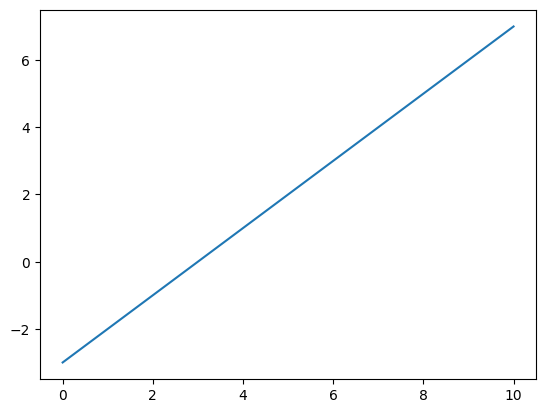

In [23]:
# 5.1 Instantiate an object Linear_ using the MathExpression Class
# The variables needed for the Kwargs m = 1, and b = -3 need to be provided as key value pairs. 
# example my_function(x=1), this would provide a **kwargs key (x) value (1)

# BEGIN SOLUTION
Linear_ = MathExpression(LinearFunction, m=1, b=-3)
# END SOLUTION

# 5.2 use the np.linspace function to make a linearly-spaced array from 0 to 10, with 100 steps
# save this to the variable x

# BEGIN SOLUTION
x = np.linspace(0, 10, 100)
# END SOLUTION

# 5.3 call the built-in `evaluate` method of the LinearFunction object over the range defined by x
# assign the output to a variable y

# BEGIN SOLUTION
y = Linear_.evaluate(x)
# END SOLUTION

# 5.4 use the function plt.plot to plot x vs y

# BEGIN SOLUTION
linear_plot = plt.plot(x, y)
# END SOLUTION

# we do not need to add more labels to this plot. It was just for testing.

In [24]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: MathExpression is instantiated correctly
failure_message: MathExpression is not instantiated correctly
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(Linear_.m)
assert isinstance(Linear_, MathExpression)
assert Linear_.m == 1
assert Linear_.b == -3

In [25]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: X vector is correct
failure_message: X vector is incorrect
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(sum(x[::4]))
assert np.isclose(sum(x[::4]), 121.212121)
assert x.__len__() == 100

In [26]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: evaluate computed correctly
failure_message: evaluate computed incorrectly
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(sum(y))
assert sum(y) == 200

In [27]:
""" # BEGIN TEST CONFIG
points: 3
hidden: false
success_message: The plot is correct
failure_message: The plot is incorrect
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(np.sum(linear_plot[0].get_data()))
assert 700 == np.sum(linear_plot[0].get_data())

# 6. A NoisyFunction

You are responsible for making a 3-4 minute VoiceThread submission that briefly explains each function of this class. *You are not responsible for writing any code or comments in this Task.*

We have written a function with several useful methods that you might want to use as an engineer. 

6.1 It inherits information from an object of type `MathExpression`

6.2 It can generate noisy data, which is to simulate real experimental data.

6.3 It can fit the data to an known function. 

6.4 It can fit, plot and format the results for quick visualization.

In [28]:
# build a class Noisy Function that Inherits MathExpression
# This is simply done writing class NoisyFunction(MathExpression)
class NoisyFunction(MathExpression):
    
    # This class does not require any specific initialization variables, but it will require that we pass the inherited variable through.
    # we have done this for you 
    # you should not touch this code. If you do, here it is
    # def __init__(self, *args, **kwargs):
    #    super().__init__(*args, **kwargs)
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    # build a function generate noisy data with two required inputs
    #   x_range - a list of the minimum and max ranges for to generate the data
    #   noise_amplitude - a float from which sets the magnitude of the noise
    def generate_noisy_data(self, x_range, noise_amplitude):
        # use np.linspace to generate x data along the range
        # generate 100 points

        x = np.linspace(x_range[0], x_range[1], 100)
        
        # call the evaluate method of the base function object to return the true values

        y_true = self.evaluate(x)
        
        # generate the noise vector by multiplying the noise amplitude by an random noise vector of length x  
        # the random noise vector should be generated with np.random.randn

        noise = noise_amplitude * np.random.randn(len(x))
        
        # add the noise to the y_true value
        # save it in a new variable y

        y = y_true + noise
        
        # return x, y, and y_true

        return x, y, y_true

    # build a function fit_data that takes 2 inputs x and y
    def fit_data(self, x, y):
        # call the curvefit function
        # provide the inherited pointed to the function
        # For the initial guess provide the true values they are contained within the saved variable kwargs
        # You can get the values of a dictionary using the built-in method .values()
        # P0 takes a list. You need to convert the values to a list.
        # Curvefit should return two values assign them to popt and pcov. 
        # popt is the fit results

        popt, pcov = curve_fit(self.func, x, y, p0=list(self.kwargs.values()))
        
        # Return popt and pcov

        return popt, pcov

    # build a function plot_fit_results that plots the raw and fit results
    # This function should take two input parameters:
    #   x_range - a tuple defining the x range to plot
    #   noise_amplitude - a float used to control the magnitude of the noise
    def plot_fit_results(self, x_range, noise_amplitude):
    

            # use the subplots function in pyplot to create a multiplot figure with 2 columns and 1 row.
            # set the figure size = 10, 5 - figsize takes a tuple
            # assign the output to two variables fig and axs
    
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            

            # make a list of strings called labels 
            # The 0th index should be "True Fit"
            # The 1st index should be "Noisy Fit"
    
            labels = ['True Fit', 'Noisy Fit']
            

            # call the generate_noisy_data function from this class
            # save the returned variables to x, y, and y_true
    
            x, y, y_true = self.generate_noisy_data(x_range, noise_amplitude)
            

            # make a look that loops over the axs with enumerate.
            # set the iterator equal to the variable i
            # set the value equal to the variable ax
    
            for i, ax in enumerate(axs):
                
    
                # create a scatterplot on the axis object 
                # plot x vs y
                # make the marker size = 5 (with the `s` tag)
                # add a label 'Raw Data' (with the `label` tag)
        
                ax.scatter(x, y, s=5, label='Raw Data')
                
    
                # write an if statement that is true if the label of the graph is "True Fit". This is ordered by the list labels you created.
        
                if labels[i] == 'True Fit':
                    
        
                    # if the statement was true on the axis object plot
                    # x vs y true
                    # make the line red using the 'r' flag
                    # add a label as indexed from the list
            
                    ax.plot(x, y_true, 'r', label=labels[i])
                
    
                # add an elif statement that is true if the label of the graph is "Noisy Fit" this is ordered by the list labels you created.
        
                elif labels[i] == 'Noisy Fit':
                    
        
                    # call the method in the class fit_data
                    # This should fit the x and y data
                    # have it return the variables popt and pcov
            
                    popt, pcov = self.fit_data(x, y)
                    
        
                    # use the predicted popt and the inherited function to generate the y values for the fit results
                    # make sure to unpack the popt list with the * operator
            
                    y_noisy_fit = self.func(x, *popt)
                    
        
                    # on the axis object plot
                    # x vs y_noisy_fit
                    # make the line blue using the 'b' flag
                    # add a label as indexed from the list
            
                    ax.plot(x, y_noisy_fit, 'b', label=labels[i])
                 
    
                # else passes to the next loop
            
                else: 
                    pass
            
    
                # use the set_xlabel method to set the x-label of the graph to 'x'
                # use the set_ylabel method to set the y-label of the graph to 'y'
        
                ax.set_xlabel('x')
                ax.set_ylabel('y')
                
    
                # call the legend method of the axis object to show the legend
        
                ax.legend()
                               
            return fig


## 7. Testing our Class

In coding it is always a good idea to run all parts of your code to check it is performing as expected. 

7.1 Create a `NoisyFunction` instance for a linear function
- Assign this object to the variable `linear_func`
- The slope should be `3` and the intercept should be `4`

7.2 Evaluate the `linear_func` to produce noisy data over the range from 0- $2\pi$
- the noise is `1`
- save the results to `x`, `y`, and `y_true`

7.3 Fit the data
- save the fit results to `popt`, `pcov`

7.4 Use the built-in method to plot the fit result
- set the range equal to `0` to `16`
- set the noise equal to `0.3`
- Save this to the variable plot


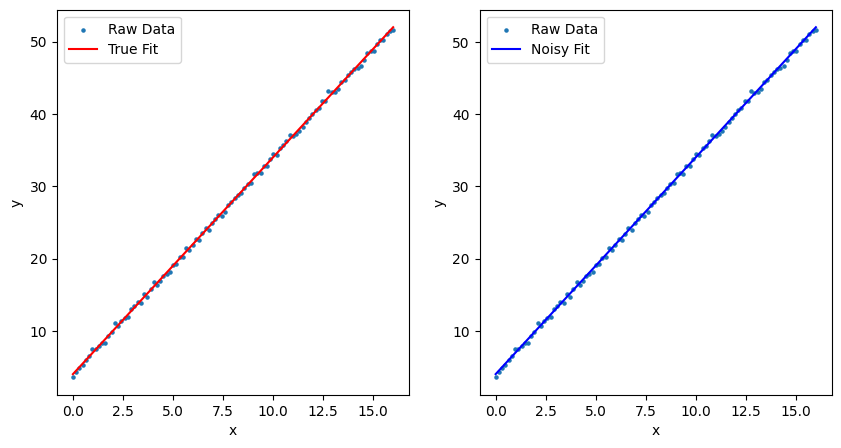

In [35]:
seed = np.random.seed(42)

# 7.1 Create a NoisyFunction instance for a linear function
# Assign this object to the variable linear_func
# The slope should be 3 and the intercept should be 4
linear_func = NoisyFunction(LinearFunction, m = 3, b = 4) # SOLUTION

# 7.2 call the generate_noisy_data function of the object the linear_func to produce noisy data over the range from 0-2pi
#   use a tuple to indicate the range from 0-2pi
#   the noise is 1
#   save the results to x, y, and y_true
x, y, y_true  = linear_func.generate_noisy_data((0, 2*np.pi), 1) # SOLUTION

# 7.3 Fit the data
# save the fit results to popt, pcov
popt, pcov = linear_func.fit_data(x, y) # SOLUTION

# 7.4 Use the built-in method to plot the fit result
# set the range equal to 0 to 16
# set the noise equal to 0.3
# Save this to the variable plot
plot = linear_func.plot_fit_results((0, 16), .3) # SOLUTION


In [36]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: linear_func implemented correctly
failure_message: linear_func implemented incorrectly
"""  # END TEST CONFIG

assert isinstance(linear_func, NoisyFunction)
drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(linear_func.m)
assert linear_func.m == 3
assert linear_func.b == 4
assert linear_func.func == LinearFunction

In [37]:
""" # BEGIN TEST CONFIG
points: 0
hidden: false
success_message: Your seed is still correct
failure_message: You might have deleted the line that sets the random seed. Please add it at the top of the cell. You will fail the autograder if you do not place the seed in the top of the cell.
"""  # END TEST CONFIG

assert seed == np.random.seed(42) 

In [38]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: x, y, y_true return correctly
failure_message: x, y, y_true return incorrectly
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(sum([x, y, y_true])[4])
assert np.isclose(sum([x, y, y_true])[4], 9.542909136398162)
assert np.isclose(np.mean(sum([x, y, y_true])[4::3]), 30.365526866857397)


In [39]:
""" # BEGIN TEST CONFIG
points: 4
hidden: false
success_message: Fitting function correctly implemented
failure_message: Fitting function incorrectly implemented
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(popt[0])
assert np.isclose(popt[0], 3.0219526649250503)
assert np.isclose(popt[1],3.8271871517503655)

In [40]:
""" # BEGIN TEST CONFIG
points: 5
hidden: false
success_message: plot implemented correctly
failure_message: plot incorrectly implemented
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(np.sum(plot.axes[0].get_lines()[0].get_xydata()))
assert np.sum(plot.axes[0].get_lines()[0].get_xydata()) == 3600
assert np.isclose(np.sum(plot.axes[1].get_lines()[0].get_xydata()), 3600.6691376113495)


## 8. Defining new math functions

Now we can view the flexibility (interoperability) of our code. 

Define two new functions. Follow the logic of the way you created `LinearFunction`.

8.1 `SineFunction`
   
$$g(x) = A (sin(2\pi f+\phi))$$

where $A$ represents amplitude, $f$ represents the frequency, and $\phi$ represents the phase.

8.2 `ExponentialFunction`

$$h(x) = ae^{bx}$$
   

In [41]:
# 8.1 Write the SineFunction here
# the inputs should be x, amplitude, frequency, phase
# BEGIN SOLUTION
def SineFunction(x, amplitude, frequency, phase):
   return amplitude * np.sin(2*np.pi*frequency * x + phase)
# END SOLUTION

# 8.1 Write the ExponentialFunction here
# the inputs should be x, a, b
# BEGIN SOLUTION
def ExponentialFunction(x, a, b):
   return a * np.exp(b * x)
# END SOLUTION

In [42]:
""" # BEGIN TEST CONFIG
points: 3
hidden: false
success_message: SineFunction implemented correctly
failure_message: SineFunction incorrectly implemented
"""  # END TEST CONFIG
import inspect
signature = inspect.signature(SineFunction)
num_parameters = len(signature.parameters)

drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(SineFunction(np.array([0.,0.1,.3]),2,3,4))
assert num_parameters == 4
assert np.allclose([-1.51360499, -0.77557439, -0.456128  ],SineFunction(np.array([0.,0.1,.3]),2,3,4))

In [43]:
""" # BEGIN TEST CONFIG
points: 3
hidden: false
success_message: SineFunction implemented correctly
failure_message: SineFunction incorrectly implemented
"""  # END TEST CONFIG
import inspect
signature = inspect.signature(ExponentialFunction)
num_parameters = len(signature.parameters)
drexel_jupyter_logger.variable_logger(ExponentialFunction(np.array([0.,0.1,.3]),2,3))
assert num_parameters == 3
assert np.allclose([2.        , 2.69971762, 4.91920622], ExponentialFunction(np.array([0.,0.1,.3]),2,3))

# 9 Using our class with the sine function

Now we can use nearly the same code from Task 7 to test our `SineFunction`.

9.1 Create a `NoisyFunction` instance for the sine function
- Assign this object to the variable `sine_func`
- The amplitude should be 2, the frequency should be .2, and the phase should be .5

9.2 apply the `generate_noisy_data` method to the `sine_func` to produce noisy data over the range from 0-6 $\pi$
- use a tuple to indicate the range from 0-6 $\pi$
- the noise is 1.5
- save the results to `x`, `y`, and `y_true`

9.3 Fit the data
- save the fit results to `popt`, `pcov`

9.4 Use the built-in method to plot the fit results
- set the range equal to 0 to 6 $\pi$
- set the noise equal to 1.5
- Save this to the variable `plot`

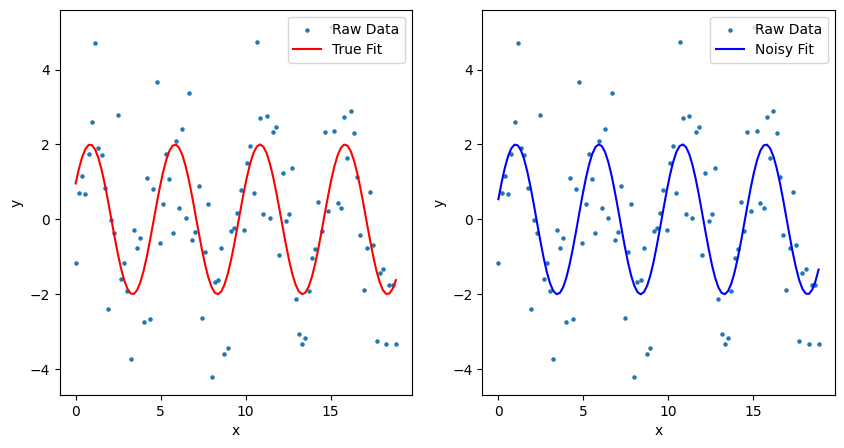

In [44]:
seed = np.random.seed(42)

# 9.1 Create a NoisyFunction instance for a sine function
# Assign this object to the variable sine_func
# The amplitude should be 2, the frequency should be .2, and the phase should be .5
sine_func = NoisyFunction(SineFunction, amplitude = 2, frequency = .2, phase = .5) # SOLUTION

# 9.2 evaluate the sine_func to produce noisy data over the range from 0-6pi
# the noise is 1.5
# save the results to x, y, and y_true
x, y, y_true  = sine_func.generate_noisy_data((0, 6*np.pi), 1.5) # SOLUTION

# 9.3 Fit the data
# save the fit results to popt, pcov
popt, pcov = sine_func.fit_data(x, y) # SOLUTION

# 9.4 Use the built-in method to plot the fit results
# set the range equal to 0 to 6 pi
# set the noise equal to 1.5
# Save this to the variable plot
plot = sine_func.plot_fit_results((0, 6*np.pi), 1.5) # SOLUTION

In [45]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: sine_func implemented correctly
failure_message: sine_func implemented incorrectly
"""  # END TEST CONFIG

assert isinstance(sine_func, NoisyFunction)
assert sine_func.amplitude == 2
assert sine_func.frequency == .2
assert sine_func.phase == .5
drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(sine_func.phase)
assert sine_func.func == SineFunction

In [46]:
""" # BEGIN TEST CONFIG
points: 0
hidden: false
success_message: Your seed is still correct
failure_message: You might have deleted the line that sets the random seed. Please add it at the top of the cell. You will fail the autograder if you do not place the seed in the top of the cell.
"""  # END TEST CONFIG

assert seed == np.random.seed(42) 

In [47]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: x, y, y_true return correctly
failure_message: x, y, y_true return incorrectly
"""  # END TEST CONFIG
drexel_jupyter_logger.variable_logger(sum([x, y, y_true])[4])
assert np.isclose(sum([x, y, y_true])[4], 4.384520747622161)
assert np.isclose(np.mean(sum([x, y, y_true])[4::3]), 9.50518884876772)


In [48]:
""" # BEGIN TEST CONFIG
points: 4
hidden: false
success_message: Fitting function correctly implemented
failure_message: Fitting function incorrectly implemented
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(popt[0])
assert np.isclose(popt[0], 2.2550781375831015)
assert np.isclose(popt[1],0.19762745754501546)

In [49]:
""" # BEGIN TEST CONFIG
points: 5
hidden: false
success_message: plot implemented correctly
failure_message: plot incorrectly implemented
"""  # END TEST CONFIG
drexel_jupyter_logger.variable_logger(np.sum(plot.axes[0].get_lines()[0].get_xydata()))
assert np.isclose(np.sum(plot.axes[0].get_lines()[0].get_xydata()), 944.5788167212941)
assert np.isclose(np.sum(plot.axes[1].get_lines()[0].get_xydata()), 943.8768017567118)


# 10 Using our class with the Exponential function

Now we can use nearly the exact same code to test our Exponential function. We wrote one code that we can use over and over again in different ways!

10.1 Create a `NoisyFunction` instance for a exponential function
- Assign this object to the variable `exp_func`
- `a` should be 2, and `b` should be .2

10.2 evaluate the exp_func to produce noisy data over the range from 0-6 $\pi$
- use a tuple to indicate the range from 0-6 $\pi$
- the noise is 1.5
- save the results to `x`, `y`, and `y_true`

10.3 Fit the data
- save the fit results to `popt`, `pcov`

10.4 Use the built-in method to plot the fit results
- set the range equal to 0 to 6 $\pi$
- set the noise equal to 1.5
- save this to the variable `plot`

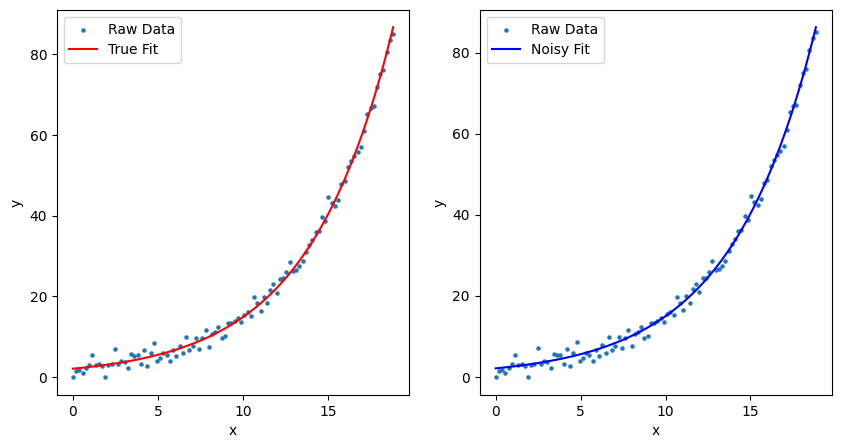

In [50]:
seed = np.random.seed(42)

# 10.1 Create a NoisyFunction instance for a exponential function
# Assign this object to the variable exp_func
# The a should be 2, and b should be .2
exp_func = NoisyFunction(ExponentialFunction, a = 2, b = .2) # SOLUTION

# 10.2 evaluate the exp_func to produce noisy data over the range from 0-6pi
# the noise is 1.5
# save the results to x, y, and y_true
x, y, y_true  = exp_func.generate_noisy_data((0, 6*np.pi), 1.5) # SOLUTION

# 10.3 Fit the data
# save the fit results to popt, pcov
popt, pcov = exp_func.fit_data(x, y) # SOLUTION

# 10.4 Use the built-in method to plot the fit results
# set the range equal to 0 to 6 pi
# set the noise equal to 1.5
# Save this to the variable plot
plot = exp_func.plot_fit_results((0, 6*np.pi), 1.5) # SOLUTION

In [51]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: exp_func implemented correctly
failure_message: exp_func implemented incorrectly
"""  # END TEST CONFIG

assert isinstance(exp_func, NoisyFunction)
assert exp_func.a == 2
assert exp_func.b == .2
drexel_jupyter_logger.variable_logger(name_)
assert isinstance(name_, str)
drexel_jupyter_logger.variable_logger(exp_func.b)
assert exp_func.func == ExponentialFunction

In [52]:
""" # BEGIN TEST CONFIG
points: 0
hidden: false
success_message: Your seed is still correct
failure_message: You might have deleted the line that sets the random seed. Please add it at the top of the cell. You will fail the autograder if you do not place the seed in the top of the cell.
"""  # END TEST CONFIG

assert seed == np.random.seed(42) 

In [53]:
""" # BEGIN TEST CONFIG
points: 1
hidden: false
success_message: x, y, y_true return correctly
failure_message: x, y, y_true return incorrectly
"""  # END TEST CONFIG
drexel_jupyter_logger.variable_logger(sum([x, y, y_true])[4])
assert np.isclose(sum([x, y, y_true])[4], 5.068497807066033)
assert np.isclose(np.mean(sum([x, y, y_true])[4::3]), 54.848917146243046)


In [54]:
""" # BEGIN TEST CONFIG
points: 4
hidden: false
success_message: Fitting function correctly implemented
failure_message: Fitting function incorrectly implemented
"""  # END TEST CONFIG

drexel_jupyter_logger.variable_logger(np.sum(plot.axes[0].get_lines()[0].get_xydata()))
assert np.isclose(popt[0], 1.9635667563774726)
assert np.isclose(popt[1], 0.20098217114795966)

In [55]:
""" # BEGIN TEST CONFIG
points: 5
hidden: false
success_message: plot implemented correctly
failure_message: plot incorrectly implemented
"""  # END TEST CONFIG
drexel_jupyter_logger.variable_logger(popt[0])
assert np.isclose(np.sum(plot.axes[0].get_lines()[0].get_xydata()), 3212.76954915798)
assert np.isclose(np.sum(plot.axes[1].get_lines()[0].get_xydata()), 3220.812931722522)
